In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [24]:
sims_single = pd.read_csv("data/similarities_bsbbert_kelex_only.tsv", sep="\t", decimal=",")
sims_ex = pd.read_csv("data/similarities_ex_bsbbert_kelex_only.tsv", sep="\t", decimal=",")

In [25]:
sims_single

,constr,kelex,sentence,fuzziness (common dep),fuzziness (matches),m,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan
0,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.5021791458129883,0.5383305549621582,20.657894134521484,19.764432907104492,445.802734375,427.11627197265625
1,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.46195539832115173,0.36032283306121826,21.63576316833496,24.413305282592773,464.2585754394531,539.3282470703125
2,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.5429515838623047,0.5767945051193237,19.55363655090332,18.686378479003906,428.8589172363281,412.24456787109375
3,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.5190093517303467,0.38207727670669556,20.2800350189209,23.808692932128906,443.40869140625,521.2367553710938
4,16,Was,Was der Düsseldorfer Telekom-Rivale heute demo...,1.0,1.0,0.75,0.47575271129608154,0.5130939483642578,21.556657791137695,20.3314151763916,470.1492919921875,449.22784423828125
...,...,...,...,...,...,...,...,...,...,...,...,...
118490,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.1764705882352941,0.1764705882352941,0.1411764705882353,0.6033834218978882,0.6061945557594299,17.763917922973633,18.140962600708008,391.2400207519531,402.8096008300781
118491,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.5689019560813904,0.6015006303787231,18.71634864807129,18.421741485595703,408.1731872558594,407.12396240234375
118492,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.1764705882352941,0.1764705882352941,0.15,0.5442083477973938,0.5701545476913452,19.292879104614258,19.176671981811523,430.9667663574219,423.114501953125
118493,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.5262190699577332,0.5715898871421814,19.777090072631836,19.240249633789062,435.052734375,421.49945068359375


In [26]:
sims_ex

,constr,kelex,sentence,fuzziness (common dep),fuzziness (matches),m,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan
0,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.6723968982696533,0.6042207479476929,15.97021198272705,17.20938491821289,345.7424621582031,371.00946044921875
1,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.789388120174408,0.6889388561248779,13.143401145935059,15.336146354675293,289.30303955078125,335.904052734375
2,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.6965886354446411,0.6465137004852295,15.25243854522705,16.193241119384766,330.8267822265625,348.2233581542969
3,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.7913379669189453,0.7251600623130798,12.752857208251953,14.243462562561035,277.34222412109375,310.7944641113281
4,15,Welch,Welch ein Image-Gewinn ...,0.0666666666666667,0.0666666666666667,0.05714285714285717,0.8092739582061768,0.7779624462127686,12.744555473327637,13.72381591796875,282.02978515625,300.8517761230469
...,...,...,...,...,...,...,...,...,...,...,...,...
123276,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7587319612503052,0.7422378063201904,13.169255256652832,13.53796672821045,290.0639953613281,296.5113525390625
123277,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7779200077056885,0.740638017654419,13.00427532196045,13.849252700805664,283.43096923828125,299.79010009765625
123278,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.1764705882352941,0.1764705882352941,0.15,0.7626950740814209,0.7175644636154175,13.422131538391113,14.41204833984375,291.7080078125,314.2170104980469
123279,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7883280515670776,0.7396715879440308,12.971418380737305,14.082070350646973,287.7232666015625,312.1008605957031


In [27]:
sims_single["sim_diff"] = sims_single.apply(lambda row: (float(row["pseudword_sim"]) - float(row["bert_sim"]))/float(row["bert_sim"]), axis=1)
sims_ex["sim_diff"] = sims_ex.apply(lambda row: (float(row["pseudword_sim"]) - float(row["bert_sim"]))/float(row["bert_sim"]), axis=1)

sims_single["euclidean_diff"] = sims_single.apply(lambda row: (float(row["bert_euclidean"]) - float(row["pseudword_euclidean"]))/float(row["pseudword_euclidean"]), axis=1)
sims_ex["euclidean_diff"] = sims_ex.apply(lambda row: (float(row["bert_euclidean"]) - float(row["pseudword_euclidean"]))/float(row["pseudword_euclidean"]), axis=1)

sims_single["manhattan_diff"] = sims_single.apply(lambda row: (float(row["bert_manhattan"]) - float(row["pseudword_manhattan"]))/float(row["pseudword_manhattan"]), axis=1)
sims_ex["manhattan_diff"] = sims_ex.apply(lambda row: (float(row["bert_manhattan"]) - float(row["pseudword_manhattan"]))/float(row["pseudword_manhattan"]), axis=1)

In [28]:
sims_single

,constr,kelex,sentence,fuzziness (common dep),fuzziness (matches),m,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan,sim_diff,euclidean_diff,manhattan_diff
0,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.5021791458129883,0.5383305549621582,20.657894134521484,19.764432907104492,445.802734375,427.11627197265625,0.071989,0.045206,0.043750
1,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.46195539832115173,0.36032283306121826,21.63576316833496,24.413305282592773,464.2585754394531,539.3282470703125,-0.220005,-0.113772,-0.139191
2,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.5429515838623047,0.5767945051193237,19.55363655090332,18.686378479003906,428.8589172363281,412.24456787109375,0.062331,0.046411,0.040302
3,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.5190093517303467,0.38207727670669556,20.2800350189209,23.808692932128906,443.40869140625,521.2367553710938,-0.263834,-0.148209,-0.149314
4,16,Was,Was der Düsseldorfer Telekom-Rivale heute demo...,1.0,1.0,0.75,0.47575271129608154,0.5130939483642578,21.556657791137695,20.3314151763916,470.1492919921875,449.22784423828125,0.078489,0.060264,0.046572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118490,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.1764705882352941,0.1764705882352941,0.1411764705882353,0.6033834218978882,0.6061945557594299,17.763917922973633,18.140962600708008,391.2400207519531,402.8096008300781,0.004659,-0.020784,-0.028722
118491,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.5689019560813904,0.6015006303787231,18.71634864807129,18.421741485595703,408.1731872558594,407.12396240234375,0.057301,0.015992,0.002577
118492,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.1764705882352941,0.1764705882352941,0.15,0.5442083477973938,0.5701545476913452,19.292879104614258,19.176671981811523,430.9667663574219,423.114501953125,0.047677,0.006060,0.018558
118493,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.5262190699577332,0.5715898871421814,19.777090072631836,19.240249633789062,435.052734375,421.49945068359375,0.086220,0.027902,0.032155


In [29]:
sims_ex

,constr,kelex,sentence,fuzziness (common dep),fuzziness (matches),m,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan,sim_diff,euclidean_diff,manhattan_diff
0,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.6723968982696533,0.6042207479476929,15.97021198272705,17.20938491821289,345.7424621582031,371.00946044921875,-0.101393,-0.072006,-0.068103
1,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.789388120174408,0.6889388561248779,13.143401145935059,15.336146354675293,289.30303955078125,335.904052734375,-0.127250,-0.142979,-0.138733
2,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.6965886354446411,0.6465137004852295,15.25243854522705,16.193241119384766,330.8267822265625,348.2233581542969,-0.071886,-0.058098,-0.049958
3,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.7913379669189453,0.7251600623130798,12.752857208251953,14.243462562561035,277.34222412109375,310.7944641113281,-0.083628,-0.104652,-0.107635
4,15,Welch,Welch ein Image-Gewinn ...,0.0666666666666667,0.0666666666666667,0.05714285714285717,0.8092739582061768,0.7779624462127686,12.744555473327637,13.72381591796875,282.02978515625,300.8517761230469,-0.038691,-0.071355,-0.062562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123276,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7587319612503052,0.7422378063201904,13.169255256652832,13.53796672821045,290.0639953613281,296.5113525390625,-0.021739,-0.027235,-0.021744
123277,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7779200077056885,0.740638017654419,13.00427532196045,13.849252700805664,283.43096923828125,299.79010009765625,-0.047925,-0.061012,-0.054569
123278,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.1764705882352941,0.1764705882352941,0.15,0.7626950740814209,0.7175644636154175,13.422131538391113,14.41204833984375,291.7080078125,314.2170104980469,-0.059173,-0.068687,-0.071635
123279,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7883280515670776,0.7396715879440308,12.971418380737305,14.082070350646973,287.7232666015625,312.1008605957031,-0.061721,-0.078870,-0.078108


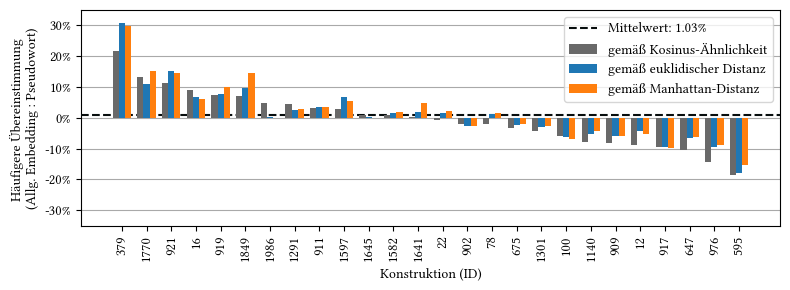

In [30]:
constr_avg_sims = sims_single.groupby('constr')["sim_diff"].mean()
constr_avg_euclidean = sims_single.groupby('constr')["euclidean_diff"].mean()
constr_avg_manhattan = sims_single.groupby('constr')["manhattan_diff"].mean()

constr_avg_sims = constr_avg_sims.sort_values(ascending=False)
constr_strings = [str(i) for i in list(constr_avg_sims.index)]

plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the grouped bars
bar_width = 0.25
bar_positions_sims = np.arange(len(constr_strings))
bar_positions_euclidean = bar_positions_sims + bar_width
bar_positions_manhattan = bar_positions_sims + 2 * bar_width

ax.bar(bar_positions_sims, constr_avg_sims.values, color='dimgrey', width=bar_width, zorder=4)
ax.bar(bar_positions_euclidean, constr_avg_euclidean[constr_avg_sims.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_manhattan, constr_avg_manhattan[constr_avg_sims.index], color='tab:orange', width=bar_width, zorder=4)

plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

overall_avg = sims_single[['sim_diff', 'euclidean_diff', 'manhattan_diff']].mean().mean()
ax.axhline(overall_avg, color='xkcd:almost black', linestyle='--', zorder=3)

ax.legend(labels=[f'Mittelwert: {overall_avg:.2%}', 'gemäß Kosinus-Ähnlichkeit', 'gemäß euklidischer Distanz', 'gemäß Manhattan-Distanz'])

plt.ylim(-0.35, 0.35)
plt.xlabel('Konstruktion (ID)')
plt.ylabel('Häufigere Übereinstimmung \n(Allg. Embedding : Pseudowort)')

plt.xticks(bar_positions_sims + bar_width, constr_strings, rotation=90)

plt.tight_layout()

plt.savefig('ratio_single_in_matches.pdf')
plt.show()

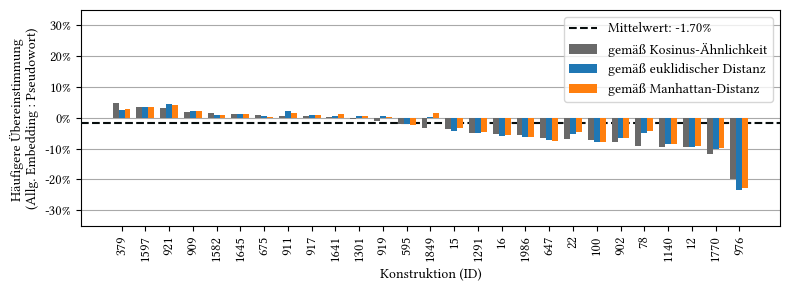

In [31]:
constr_avg_sims = sims_ex.groupby('constr')["sim_diff"].mean()
constr_avg_euclidean = sims_ex.groupby('constr')["euclidean_diff"].mean()
constr_avg_manhattan = sims_ex.groupby('constr')["manhattan_diff"].mean()

constr_avg_sims = constr_avg_sims.sort_values(ascending=False)
constr_strings = [str(i) for i in list(constr_avg_sims.index)]

plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the grouped bars
bar_width = 0.25
bar_positions_sims = np.arange(len(constr_strings))
bar_positions_euclidean = bar_positions_sims + bar_width
bar_positions_manhattan = bar_positions_sims + 2 * bar_width

ax.bar(bar_positions_sims, constr_avg_sims.values, color='dimgrey', width=bar_width, zorder=4)
ax.bar(bar_positions_euclidean, constr_avg_euclidean[constr_avg_sims.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_manhattan, constr_avg_manhattan[constr_avg_sims.index], color='tab:orange', width=bar_width, zorder=4)

plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

overall_avg = sims_ex[['sim_diff', 'euclidean_diff', 'manhattan_diff']].mean() .mean()
ax.axhline(overall_avg, color='xkcd:almost black', linestyle='--', zorder=3)

ax.legend(labels=[f'Mittelwert: {overall_avg:.2%}', 'gemäß Kosinus-Ähnlichkeit', 'gemäß euklidischer Distanz', 'gemäß Manhattan-Distanz'])

plt.ylim(-0.35, 0.35)
plt.xlabel('Konstruktion (ID)')
plt.ylabel('Häufigere Übereinstimmung \n(Allg. Embedding : Pseudowort)')

plt.xticks(bar_positions_sims + bar_width, constr_strings, rotation=90)

plt.tight_layout()

plt.savefig('ratio_ex_in_matches.pdf')
plt.show()

Display the ratio between pseudo vs. usual embeds better:

In [32]:
sims_single["pseudo_pred_sim"] = sims_single.apply(lambda row: row["sim_diff"] > 0, axis=1)
sims_single["pseudo_pred_euclidean"] = sims_single.apply(lambda row: row["euclidean_diff"] > 0, axis=1)
sims_single["pseudo_pred_manhattan"] = sims_single.apply(lambda row: row["manhattan_diff"] > 0, axis=1)
sims_single

,constr,kelex,sentence,fuzziness (common dep),fuzziness (matches),m,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan,sim_diff,euclidean_diff,manhattan_diff,pseudo_pred_sim,pseudo_pred_euclidean,pseudo_pred_manhattan
0,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.5021791458129883,0.5383305549621582,20.657894134521484,19.764432907104492,445.802734375,427.11627197265625,0.071989,0.045206,0.043750,True,True,True
1,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.46195539832115173,0.36032283306121826,21.63576316833496,24.413305282592773,464.2585754394531,539.3282470703125,-0.220005,-0.113772,-0.139191,False,False,False
2,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.5429515838623047,0.5767945051193237,19.55363655090332,18.686378479003906,428.8589172363281,412.24456787109375,0.062331,0.046411,0.040302,True,True,True
3,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.5190093517303467,0.38207727670669556,20.2800350189209,23.808692932128906,443.40869140625,521.2367553710938,-0.263834,-0.148209,-0.149314,False,False,False
4,16,Was,Was der Düsseldorfer Telekom-Rivale heute demo...,1.0,1.0,0.75,0.47575271129608154,0.5130939483642578,21.556657791137695,20.3314151763916,470.1492919921875,449.22784423828125,0.078489,0.060264,0.046572,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118490,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.1764705882352941,0.1764705882352941,0.1411764705882353,0.6033834218978882,0.6061945557594299,17.763917922973633,18.140962600708008,391.2400207519531,402.8096008300781,0.004659,-0.020784,-0.028722,True,False,False
118491,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.5689019560813904,0.6015006303787231,18.71634864807129,18.421741485595703,408.1731872558594,407.12396240234375,0.057301,0.015992,0.002577,True,True,True
118492,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.1764705882352941,0.1764705882352941,0.15,0.5442083477973938,0.5701545476913452,19.292879104614258,19.176671981811523,430.9667663574219,423.114501953125,0.047677,0.006060,0.018558,True,True,True
118493,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.5262190699577332,0.5715898871421814,19.777090072631836,19.240249633789062,435.052734375,421.49945068359375,0.086220,0.027902,0.032155,True,True,True


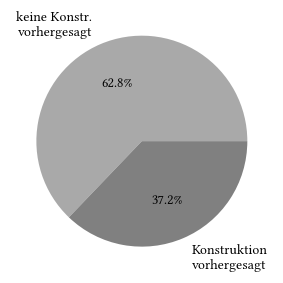

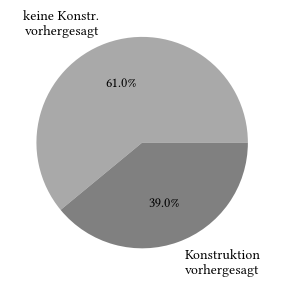

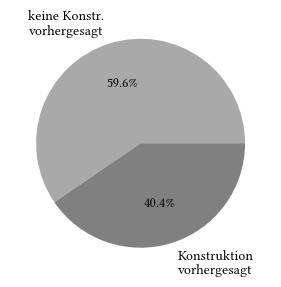

In [33]:
for sim in ["sim", "euclidean", "manhattan"]:
    constr_counts = sims_single["pseudo_pred_" + sim].value_counts().sort_values(ascending=False)
    constr_strings = ["Konstruktion\nvorhergesagt" if i else "keine Konstr.\nvorhergesagt" for i in list(constr_counts.index)]
    
    plt.rcParams['font.family'] = 'Libertinus Serif'
    fig, ax = plt.subplots(figsize=(3, 3))
    
    plt.pie(constr_counts, labels=constr_strings, autopct='%1.1f%%', labeldistance=1.2, colors=["darkgrey", "grey"])
    
    plt.tight_layout()
    
    plt.savefig(f'pseudo_vs_common_in_matches_{sim}.pdf')
    plt.show()

In [34]:
sims_ex["pseudo_pred_sim"] = sims_ex.apply(lambda row: row["sim_diff"] > 0, axis=1)
sims_ex["pseudo_pred_euclidean"] = sims_ex.apply(lambda row: row["euclidean_diff"] > 0, axis=1)
sims_ex["pseudo_pred_manhattan"] = sims_ex.apply(lambda row: row["manhattan_diff"] > 0, axis=1)
sims_ex

,constr,kelex,sentence,fuzziness (common dep),fuzziness (matches),m,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan,sim_diff,euclidean_diff,manhattan_diff,pseudo_pred_sim,pseudo_pred_euclidean,pseudo_pred_manhattan
0,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.6723968982696533,0.6042207479476929,15.97021198272705,17.20938491821289,345.7424621582031,371.00946044921875,-0.101393,-0.072006,-0.068103,False,False,False
1,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.789388120174408,0.6889388561248779,13.143401145935059,15.336146354675293,289.30303955078125,335.904052734375,-0.127250,-0.142979,-0.138733,False,False,False
2,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.6965886354446411,0.6465137004852295,15.25243854522705,16.193241119384766,330.8267822265625,348.2233581542969,-0.071886,-0.058098,-0.049958,False,False,False
3,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.7913379669189453,0.7251600623130798,12.752857208251953,14.243462562561035,277.34222412109375,310.7944641113281,-0.083628,-0.104652,-0.107635,False,False,False
4,15,Welch,Welch ein Image-Gewinn ...,0.0666666666666667,0.0666666666666667,0.05714285714285717,0.8092739582061768,0.7779624462127686,12.744555473327637,13.72381591796875,282.02978515625,300.8517761230469,-0.038691,-0.071355,-0.062562,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123276,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7587319612503052,0.7422378063201904,13.169255256652832,13.53796672821045,290.0639953613281,296.5113525390625,-0.021739,-0.027235,-0.021744,False,False,False
123277,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7779200077056885,0.740638017654419,13.00427532196045,13.849252700805664,283.43096923828125,299.79010009765625,-0.047925,-0.061012,-0.054569,False,False,False
123278,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.1764705882352941,0.1764705882352941,0.15,0.7626950740814209,0.7175644636154175,13.422131538391113,14.41204833984375,291.7080078125,314.2170104980469,-0.059173,-0.068687,-0.071635,False,False,False
123279,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7883280515670776,0.7396715879440308,12.971418380737305,14.082070350646973,287.7232666015625,312.1008605957031,-0.061721,-0.078870,-0.078108,False,False,False


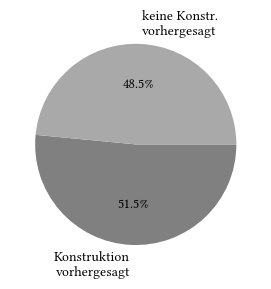

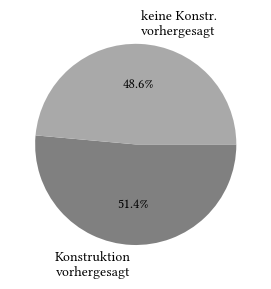

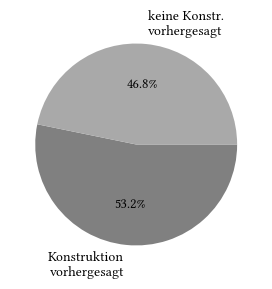

In [35]:
for sim in ["sim", "euclidean", "manhattan"]:
    constr_counts = sims_ex["pseudo_pred_" + sim].value_counts().sort_values(ascending=False)
    constr_strings = ["Konstruktion\nvorhergesagt" if i else "keine Konstr.\nvorhergesagt" for i in list(constr_counts.index)]
    
    fig, ax = plt.subplots(figsize=(3, 3))
    
    plt.rcParams['font.family'] = 'Libertinus Serif'
    
    plt.pie(constr_counts, labels=constr_strings, autopct='%1.1f%%', labeldistance=1.2, colors=["grey", "darkgrey"], counterclock=False)
    
    plt.tight_layout()
    
    plt.savefig(f'pseudo_vs_common_in_matches_{sim}_ex.pdf')
    plt.show()

Finally, get a ranking of example quality per construction $q = m \cdot \frac{\Delta + 1}{2} = m \cdot \frac{\frac{\Delta_{\cos} + \Delta_{2} + \Delta_{1}}{3} + 1}{2} \in [0, 1]$:

In [36]:
sims_single["q"] = sims_single.apply(lambda row: (((row["sim_diff"] + row["euclidean_diff"] + row["manhattan_diff"])/3)+1)/2 * max(float(row["m"]), 0), axis=1)
sims_ex["q"] = sims_single.apply(lambda row: (((row["sim_diff"] + row["euclidean_diff"] + row["manhattan_diff"])/3)+1)/2 * max(float(row["m"]), 0), axis=1)

In [37]:
sims_single

,constr,kelex,sentence,fuzziness (common dep),fuzziness (matches),m,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan,sim_diff,euclidean_diff,manhattan_diff,pseudo_pred_sim,pseudo_pred_euclidean,pseudo_pred_manhattan,q
0,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.5021791458129883,0.5383305549621582,20.657894134521484,19.764432907104492,445.802734375,427.11627197265625,0.071989,0.045206,0.043750,True,True,True,0.028223
1,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.46195539832115173,0.36032283306121826,21.63576316833496,24.413305282592773,464.2585754394531,539.3282470703125,-0.220005,-0.113772,-0.139191,False,False,False,0.022563
2,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.5429515838623047,0.5767945051193237,19.55363655090332,18.686378479003906,428.8589172363281,412.24456787109375,0.062331,0.046411,0.040302,True,True,True,0.028116
3,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.5190093517303467,0.38207727670669556,20.2800350189209,23.808692932128906,443.40869140625,521.2367553710938,-0.263834,-0.148209,-0.149314,False,False,False,0.021774
4,16,Was,Was der Düsseldorfer Telekom-Rivale heute demo...,1.0,1.0,0.75,0.47575271129608154,0.5130939483642578,21.556657791137695,20.3314151763916,470.1492919921875,449.22784423828125,0.078489,0.060264,0.046572,True,True,True,0.398166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118490,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.1764705882352941,0.1764705882352941,0.1411764705882353,0.6033834218978882,0.6061945557594299,17.763917922973633,18.140962600708008,391.2400207519531,402.8096008300781,0.004659,-0.020784,-0.028722,True,False,False,0.069533
118491,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.5689019560813904,0.6015006303787231,18.71634864807129,18.421741485595703,408.1731872558594,407.12396240234375,0.057301,0.015992,0.002577,True,True,True,0.072373
118492,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.1764705882352941,0.1764705882352941,0.15,0.5442083477973938,0.5701545476913452,19.292879104614258,19.176671981811523,430.9667663574219,423.114501953125,0.047677,0.006060,0.018558,True,True,True,0.076807
118493,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.5262190699577332,0.5715898871421814,19.777090072631836,19.240249633789062,435.052734375,421.49945068359375,0.086220,0.027902,0.032155,True,True,True,0.074030


In [38]:
sims_ex

,constr,kelex,sentence,fuzziness (common dep),fuzziness (matches),m,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan,sim_diff,euclidean_diff,manhattan_diff,pseudo_pred_sim,pseudo_pred_euclidean,pseudo_pred_manhattan,q
0,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.6723968982696533,0.6042207479476929,15.97021198272705,17.20938491821289,345.7424621582031,371.00946044921875,-0.101393,-0.072006,-0.068103,False,False,False,0.028223
1,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.0625,0.0625,0.053571428571428575,0.789388120174408,0.6889388561248779,13.143401145935059,15.336146354675293,289.30303955078125,335.904052734375,-0.127250,-0.142979,-0.138733,False,False,False,0.022563
2,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.6965886354446411,0.6465137004852295,15.25243854522705,16.193241119384766,330.8267822265625,348.2233581542969,-0.071886,-0.058098,-0.049958,False,False,False,0.028116
3,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.0625,0.0625,0.053571428571428575,0.7913379669189453,0.7251600623130798,12.752857208251953,14.243462562561035,277.34222412109375,310.7944641113281,-0.083628,-0.104652,-0.107635,False,False,False,0.021774
4,15,Welch,Welch ein Image-Gewinn ...,0.0666666666666667,0.0666666666666667,0.05714285714285717,0.8092739582061768,0.7779624462127686,12.744555473327637,13.72381591796875,282.02978515625,300.8517761230469,-0.038691,-0.071355,-0.062562,False,False,False,0.398166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123276,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7587319612503052,0.7422378063201904,13.169255256652832,13.53796672821045,290.0639953613281,296.5113525390625,-0.021739,-0.027235,-0.021744,False,False,False,NaN
123277,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7779200077056885,0.740638017654419,13.00427532196045,13.849252700805664,283.43096923828125,299.79010009765625,-0.047925,-0.061012,-0.054569,False,False,False,NaN
123278,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.1764705882352941,0.1764705882352941,0.15,0.7626950740814209,0.7175644636154175,13.422131538391113,14.41204833984375,291.7080078125,314.2170104980469,-0.059173,-0.068687,-0.071635,False,False,False,NaN
123279,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.1764705882352941,0.1764705882352941,0.1411764705882353,0.7883280515670776,0.7396715879440308,12.971418380737305,14.082070350646973,287.7232666015625,312.1008605957031,-0.061721,-0.078870,-0.078108,False,False,False,NaN


Create a pretty output for human annotation:

In [39]:
q_single = sims_single[["constr", "sentence", "q"]].groupby(["constr", "sentence"]).mean().sort_values(by=["constr", "q"], ascending=[True, False])
q_single.to_csv(f"../../out/matches/q_single.tsv", sep="\t", decimal=",")
q_single

q
constr sentence                                                    
12     Dieser hat allerdings weder die Möglichkeit , P...  0.025393
       Das gestrige Ereignis hatte weder verletzte Per...  0.024945
16     Was benutzt der den für ein Handy , welche Frei...  0.431609
       Was die fertige Version der Software einmal kos...  0.424061
       Was dafür verwendet wurde , geht aus dem Antrag...  0.423668
...                                                             ...
1986   Siemens-Handys hätten zwar in Deutschland einen...  0.068137
       Aber auch die CHRP-MacOS-ROMs würden kaum vor O...  0.068131
       Etwas undurchsichtig ist Intels Zug , im Rahmen...  0.068105
       Aber nicht nur die rüstigen Alten unter den Aut...  0.067206
       Die Geräte werden eher teurer als billiger ; un...  0.060218

[84153 rows x 1 columns]

In [40]:
q_ex = sims_ex[["constr", "sentence", "q"]].groupby(["constr", "sentence"]).mean().sort_values(by=["constr", "q"], ascending=[True, False])
q_ex.to_csv(f"../../out/matches/q_ex.tsv", sep="\t", decimal=",")
q_ex

q
constr sentence                                                    
12     Dieser hat allerdings weder die Möglichkeit , P...  0.025393
       Das gestrige Ereignis hatte weder verletzte Per...  0.024945
15     Welch ein Image-Gewinn ...                          0.398166
       Welch Wunder , dass die Macher nicht noch ein "...  0.397455
       Welch schönes Gefühl ist es , in Bobotemp-Short...  0.389999
...                                                             ...
1986   WAP als Vorstufe zum mobilen Internet jedenfall...       NaN
       Weniger bekannte Bewerber ohne institutionellen...       NaN
       Wenn die Nachfrage nach Spezialisten groß ist ,...       NaN
       Wer jetzt erst bestellt , dürfte kaum noch eine...       NaN
       Wie Messungen der c't belegen , hatte die Absch...       NaN

[86098 rows x 1 columns]